# Day 11

## Part 1

- Find the sum of the manhattan distances between all pairs of galaxies
- empty rows and columns count for double

In [70]:
from copy import deepcopy

from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

from advent_of_code_utils.advent_of_code_utils import (
    parse_from_file, ParseConfig, markdown
)

In [71]:
def parse_galaxy(pixel: str) -> int:
    """converts a pixel to an integer encoding its content"""
    match (pixel):
        case '#':
            return 10
        case _:
            return 0

parser = ParseConfig('\n', ParseConfig('', parse_galaxy))

raw_image = parse_from_file('puzzle_input\\day_11.txt', parser)

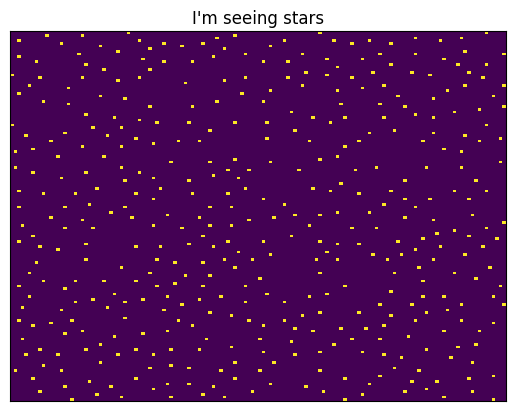

In [72]:
def plot_image(image: list[list[int]], title: str) -> None:
    """creates a pcolormesh of the pixel array"""
    fig, ax = plt.subplots()
    ax.pcolormesh(np.flipud(image))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

plot_image(raw_image, 'I\'m seeing stars')

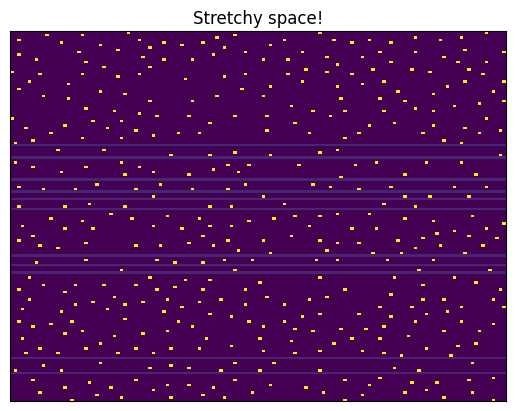

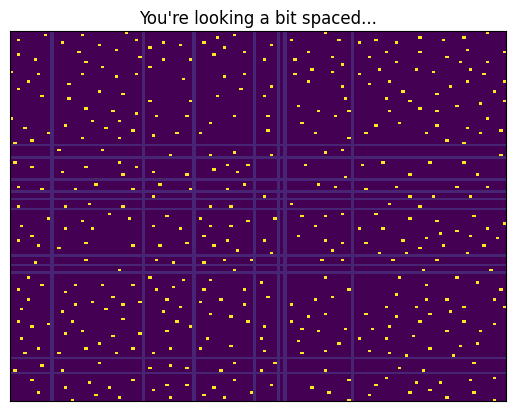

In [73]:
# let's account for the universal expansion next

# rows
image = []
for row in raw_image:
    if not any(row):
        image.append([1]*len(row))
    image.append(row)

plot_image(image, 'Stretchy space!')

# cols
transposed = list(zip(*image))
temp = []
for col in transposed:
    if not any([value == 10 for value in col]):
        temp.append([1]*len(col))
    temp.append(col)
image = list(zip(*temp))

plot_image(image, 'You\'re looking a bit spaced...')


In [74]:
stars = []
for n_row, row in enumerate(image):
    for n_col, value in enumerate(row):
        if value == 10:
            stars.append((n_row, n_col))

total_distance = 0
for start, star in tqdm(enumerate(stars[:-1])):
    for other_star in stars[start + 1:]:
        total_distance += abs(star[0] - other_star[0]) + \
            abs(star[1] - other_star[1])



0it [00:00, ?it/s]

434it [00:00, 5342.45it/s]


In [75]:
markdown(
    '### Solution',
    f'The total distance between all pairs of stars is: {total_distance}'
)

### Solution
The total distance between all pairs of stars is: 9693756

## Part 2

- There are now 1 million times extra emtpy rows instead of 2x

In [76]:
# lets just find the raw image distance and then use where the empty rows are
# to add 1M to the total
# rows
row_gaps = []
for n_row, row in enumerate(raw_image):
    if not any(row):
        row_gaps.append(n_row)

# cols
transposed = list(zip(*raw_image))
col_gaps = []
for n_col, col in enumerate(transposed):
    if not any(col):
        col_gaps.append(n_col)

In [81]:
raw_stars = []
for n_row, row in enumerate(image):
    for n_col, value in enumerate(row):
        if value == 10:
            raw_stars.append((n_row, n_col))

new_total_distance = 0
for start, star in tqdm(enumerate(stars[:-1])):
    for other_star in stars[start + 1:]:
        new_total_distance += abs(star[0] - other_star[0]) + \
            abs(star[1] - other_star[1]) - 1
        for gap in row_gaps:
            if star[0] < gap < other_star[0] or other_star[0] < gap < star[0]:
                new_total_distance += 999_998
        for gap in col_gaps:
            if star[1] < gap < other_star[1] or other_star[1] < gap < star[1]:
                new_total_distance += 999_998

0it [00:00, ?it/s]

434it [00:00, 490.60it/s]


In [82]:
markdown(
    '### Solution',
    f'The acutal total distance between all pairs is: {new_total_distance}'
)

### Solution
The acutal total distance between all pairs is: 726167147043